## MNIST

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Bidirectional, Flatten, Dense, SimpleRNN, LSTM, BatchNormalization, Dropout, Activation
from tensorflow.keras.initializers import RandomNormal, Constant

In [ ]:

# 데이터 Load
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 4차원 배열로 지정 후 정규화
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 원-핫 인코딩
one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

In [ ]:
# 모델 학습
# 컨볼루션 - 맥스풀링
# 2차원 배열로 변환 후 GRU을 추가하여 학습하였으나 정확도의 변화가 거의 없었습니다.
# 1차원 배열로 변환 후 Dense layer로 학습, 출력

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(tf.keras.layers.Reshape(target_shape = (64, 3*3)))
# model.add(Bidirectional(tf.keras.layers.GRU(64, input_shape = (64, 3*3), return_sequences = True)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_images, one_hot_train_labels, epochs=10, batch_size=128, validation_data = (test_images, one_hot_test_labels), validation_split=0.2)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 576)              

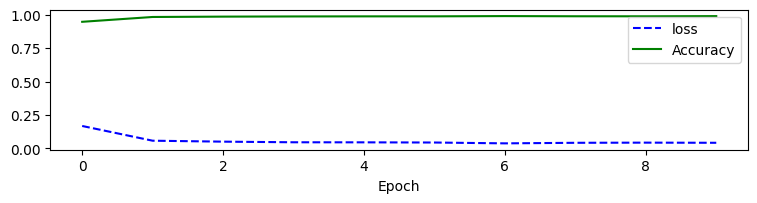

========test results======
313/313 [==============================] - 1s 3ms/step - loss: 0.0627 - accuracy: 0.9853

 Accuracy: 0.9853


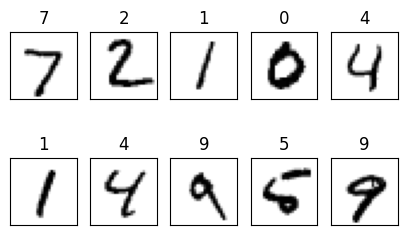

In [ ]:
# loss, accuracy 시각화
plt.figure(figsize=(9,4))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

print("========test results======")
labels = model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
print('=========================')

# 결과 도출
fig = plt.figure(figsize=(5, 3))
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.show()
